<a href="https://colab.research.google.com/github/silverstar0727/many_body_problem/blob/master/threebody_code_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import time
start_time = time.time()
import numpy as np
import math
import matplotlib.pyplot as plt

# 초기조건
def func(ieq, r, theta, mu, dv):
  v_e = np.sqrt((1.0 - mu) / r)
  V = v_e + dv
  if ieq == 1:
    return r * np.cos(theta) - mu
  if ieq == 2:
    return r * np.sin(theta)
  if ieq == 3:
    return -1.0 * V * np.sin(theta)
  if ieq == 4:
    return V * np.cos(theta)

#/*Function for RK4*/
def RHS(ieq, t, x, y, u_x, u_y, mu):
#make new parameters to simplify typing inputs inputs
  A=(x+mu)
  B=(x-1.0+mu)
  c=2.0
  C=(1-mu)
  R1 = ((A**2)+(y**2))**(3.0/2.0)
  R2 = ((B**2)+(y**2))**(3.0/2.0)
  #defining equations in order: x , vx, y, vy  Baines, Hew, and Toyama 18
  if ieq == 1: 
    return u_x
  if ieq == 2:
    return (c*u_y)+x-((A*C)/R1)-((B*mu)/R2)
  if ieq == 3:
    return u_y
  if ieq == 4:
    return (-1.0*c*u_x)+(y*(1-(C/R1)-(mu/R2)))

In [0]:
"""Define System Parameters""" 
m1 = 5.972E24 #mass of earth
m2 = 7.348E22 #mass of moon
M = m1+m2 # total mass of system
E_to_M = 3.844E5 #distance to moon
R_Earth = 6371/E_to_M #radius of Earth
R_Moon = 1737/E_to_M #radius of moon
H = 0/E_to_M #choose height above radius of Earth
mu_i = m2/M #order of unity for dimensional form
r_orb = R_Earth+H #defining parameter to determine initial x,y, vx, vy
#P_orb = (2*np.pi)*np.sqrt((r_orb**3)/(1-mu_i)) #calculates expected orbital period, uncomment and set Dv = 
#0 and adjust H

theta_orb = 226.81*(np.pi/180) # covert degrees to radians

Dv = 3.14 #set ejection velocity

"""Calculate Initial values"""
x = func(1, r_orb, theta_orb, mu_i, Dv)
y = func(2, r_orb, theta_orb, mu_i, Dv)
vx = func(3, r_orb, theta_orb, mu_i, Dv) + y
vy = func(4, r_orb, theta_orb, mu_i, Dv) - x

#print ("%e , %e\n" % (mu_i,R_Earth)) #uncomment to print
#print ("|\tR\t|\tx\t|\ty\t|\tvx\t|\tvy\t|\n|%e\t|%e\t|%e\t|%e\t|%e\t|" % (R_Earth, x, y,vx,vy)) uncomment 
#to print

"""Define list to append values of from RK4"""
t_list = [0.0]
x_list = [x]
y_list = [y]
vx_list = [vx]
vy_list = [vy]

"""Define initial conditions for RK4 numerical calculation"""
t_i = 0.0
x_i= x
y_i= y
u_xi= vx
u_yi= vy

N = 1000000 #intervales
step = 1/N #step size

In [0]:
while (x_i <= (1-mu_i)):
  """define initial conditions"""
  """/*Calculate all K1 values: first step*/""" 
  K1_x = step*RHS(1, t_i, x_i, y_i, u_xi, u_yi, mu_i)
  K1_y = step*RHS(3, t_i, x_i, y_i, u_xi, u_yi, mu_i)
  K1_ux = step*RHS(2, t_i, x_i, y_i, u_xi, u_yi, mu_i)
  K1_uy = step*RHS(4, t_i, x_i, y_i, u_xi, u_yi, mu_i)
  """/*Calculate all K2 values: half step*/""" 
  K2_x = step*RHS(1, t_i + step/2, x_i + K1_x/2, y_i + K1_y/2, u_xi + K1_ux/2, u_yi + K1_uy/2, mu_i)
  K2_y = step*RHS(3, t_i + step/2, x_i + K1_x/2, y_i + K1_y/2, u_xi + K1_ux/2, u_yi + K1_uy/2, mu_i)
  K2_ux = step*RHS(2, t_i + step/2, x_i + K1_x/2, y_i + K1_y/2, u_xi + K1_ux/2, u_yi + K1_uy/2, mu_i)
  K2_uy = step*RHS(4, t_i + step/2, x_i + K1_x/2, y_i + K1_y/2, u_xi + K1_ux/2, u_yi + K1_uy/2, mu_i)
  """/*Calculate all K3 values : half steps*/"""
  K3_x = step*RHS(1, t_i + step/2, x_i + K2_x/2, y_i + K2_y/2, u_xi + K2_ux/2, u_yi + K2_uy/2, mu_i)
  K3_y = step*RHS(3, t_i + step/2, x_i + K2_x/2, y_i + K2_y/2, u_xi + K2_ux/2, u_yi + K2_uy/2, mu_i)
  K3_ux = step*RHS(2, t_i + step/2, x_i + K2_x/2, y_i + K2_y/2, u_xi + K2_ux/2, u_yi + K2_uy/2, mu_i)
  K3_uy = step*RHS(4, t_i + step/2, x_i + K2_x/2, y_i + K2_y/2, u_xi + K2_ux/2, u_yi + K2_uy/2, mu_i)
  """/*Calculate all K4 values: full step*/"""
  K4_x = step*RHS(1, t_i + step, x_i + K3_x, y_i + K3_y, u_xi + K3_ux, u_yi + K3_uy, mu_i)
  K4_y = step*RHS(3, t_i + step, x_i + K3_x, y_i + K3_y, u_xi + K3_ux, u_yi + K3_uy, mu_i)
  K4_ux = step*RHS(2, t_i + step, x_i + K3_x, y_i + K3_y, u_xi + K3_ux, u_yi + K3_uy, mu_i)
  K4_uy = step*RHS(4, t_i + step, x_i + K3_x, y_i + K3_y, u_xi + K3_ux, u_yi + K3_uy, mu_i) 
  """/*Update conditions*/"""
  t_i += step
  x_i += ((K1_x + K4_x)/6)+ ((K2_x + K3_x)/3)
  u_xi += ((K1_ux + K4_ux)/6)+ ((K2_ux + K3_ux)/3 )
  y_i += ((K1_y + K4_y)/6)+ ((K2_y + K3_y)/3)
  u_yi += ((K1_uy + K4_uy)/6)+ ((K4_uy + K3_uy)/3)
 
  #print ("%e\t%e\n" % (x_i,y_i))
  """/*Append to values to list*/"""
  t_list.append(t_i)
  x_list.append(x_i)
  y_list.append(y_i)
  vx_list.append(u_xi)
  vy_list.append(u_yi)
 

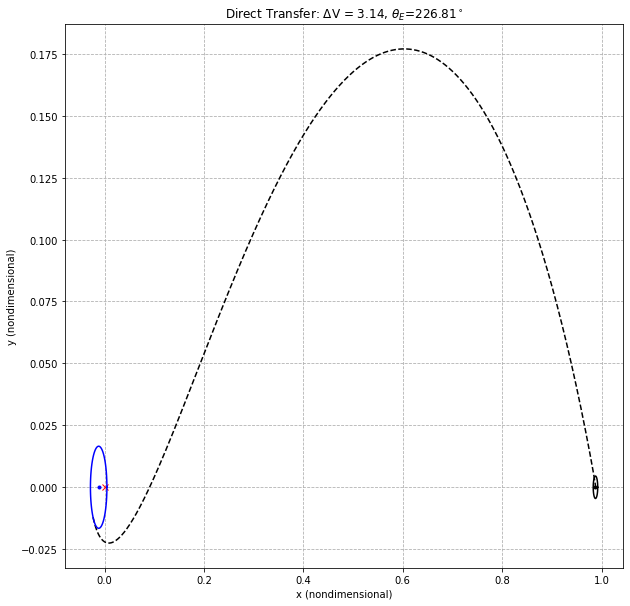

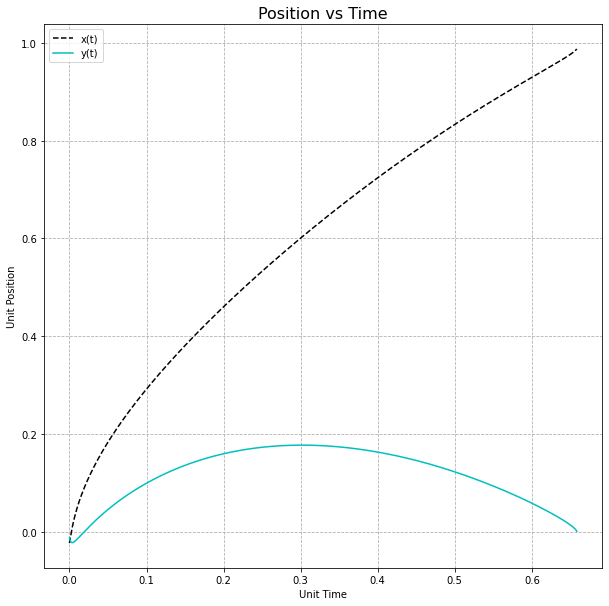

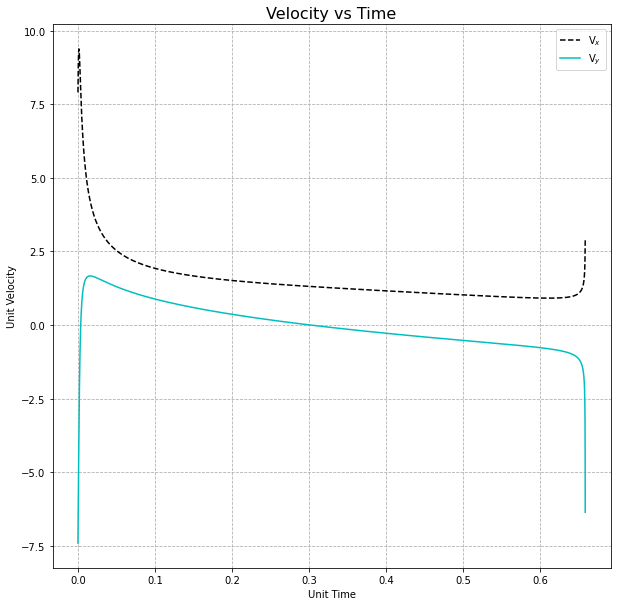

My program took 106.49949669837952 to run


In [12]:
########################################################################
#"""Convert List into array"""
Time = np.vstack(np.array(t_list)) #time array
x_array = np.vstack(np.array(x_list)) 
y_array = np.vstack(np.array(y_list))
vx_array = np.vstack(np.array(vx_list)) 
vy_array = np.vstack(np.array(vy_list))
XY = np.append(x_array,y_array, axis = 1) #positions array
VXY = np.append(vx_array,vy_array, axis = 1) #velocities array
Data = np.append(Time, (np.append(XY , VXY, axis =1)), axis = 1) #data array with all values (dimensionless 
#quantities)
#np.savetxt("TrajH21000.txt", Data, fmt = "%s") #save array to file if need be uncomment and edit filename 
#comment line when not using


#"""Parameter Coordinates to be ploted"""
t_val = Data[:,0] # select all time values
x_val = Data[:,1] # select all x values
y_val = Data[:,2] # select all y values
vx_val = Data[:,3] # select all velocity-x values
vy_val = Data[:,4] # select all velocity-y values

#"""Plot for Earth and moon circle"""
phi = np.linspace(0,2*np.pi,100) #generate values for plot
r_Ex = R_Earth*np.cos(phi)-mu_i
r_Ey = R_Earth*np.sin(phi)

r_Mx = R_Moon*np.cos(phi)+(1-mu_i)
r_My = R_Moon*np.sin(phi)

#"""Plotting Features"""
f = plt.figure(figsize = (10,10))
plt.figure(1)
plt.title("Direct Transfer: $\Delta$V = 3.14, $θ_{E}$=226.81$^\circ$")
plt.xlabel("x (nondimensional)")
plt.ylabel("y (nondimensional)")
#plt.axis([-0.2,1.1,-0.10,0.10])
#plt.axis([0.9,1.1,-0.025,0.025])
#plt.axis([-0.3,1.1,-0.50,2.0])
plt.plot(0,0,'rx') # center of mass of earth-moon system
plt.plot(x_val, y_val, 'k--') #plot x y phase space
plt.plot(r_Ex,r_Ey,'b-',-mu_i,0, 'b.') #plot radius of earth
plt.plot(r_Mx,r_My, 'k-',(1-mu_i),0, 'k.') #plot radius of moon
plt.grid(linestyle = '--')
#plt.savefig("226_81deg.png") #save fig uncomment rerun to save

f = plt.figure(figsize = (10,10))
plt.figure(2)
plt.title("Position vs Time", fontsize = 16)
plt.xlabel("Unit Time")
plt.ylabel("Unit Position")
plt.plot(Time, x_val, 'k--', label = "x(t)")
plt.plot(Time, y_val, 'c-', label = "y(t)")
plt.legend()
plt.grid(linestyle = '--')
#plt.savefig("pvt.png") #uncomment to save fig, position vs time
#"""Plot both vx and vy velocity vs time"""
f = plt.figure(figsize = (10,10))
plt.figure(3)
plt.title("Velocity vs Time", fontsize = 16)
plt.xlabel("Unit Time")
plt.ylabel("Unit Velocity")
plt.plot(Time, vx_val, 'k--',label = "V$_{x}$")
plt.plot(Time, vy_val, 'c-', label = "V$_{y}$")
plt.grid(linestyle = '--')
plt.legend()
#plt.savefig("vvt.png") #uncomment to save fig, velocity vs time

plt.show()
print ("My program took", time.time() - start_time, "to run") #print time that it takes to run code